<a href="https://colab.research.google.com/github/Nii-92/data-driven-assignment.-nii/blob/main/Data_driven_assignment_NII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Introduction:
Facebook Network Analysis
 This code analyzes the structure and properties of the Facebook network.
Exploration of various characteristics of the network such as.
 Degree distribution: How many connections does each user have?
Clustering coefficient: How likely are friends of a user to be friends with each other?
Centrality:most important components
 Connected components: Are there separate groups within the network?
 We will then compare the Facebook network with various random network models
 (Erdős–Rényi, Barabási–Albert, and Watts-Strogatz) to identify specific
structural patterns that are not present in randomly generated networks.
 This analysis will reveal key characteristics that distinguish the Facebook
 network from random networks and highlight the importance of hubs,
 clustering, and connected components in this social network.




In [15]:
pip install networkx matplotlib pandas

Number of nodes: 4039
Number of edges: 88234


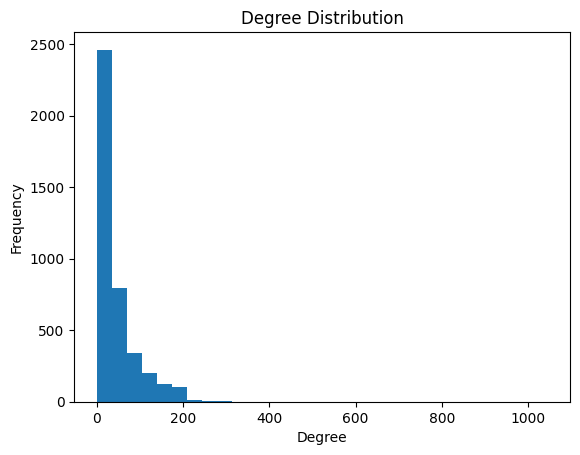

Average Clustering Coefficient: 0.6055467186200876
Degree Centrality of first 5 nodes: {0: 0.08593363051015354, 1: 0.004210004952947003, 2: 0.0024764735017335313, 3: 0.004210004952947003, 4: 0.0024764735017335313}
Number of connected components: 1
Size of the largest connected component: 4039


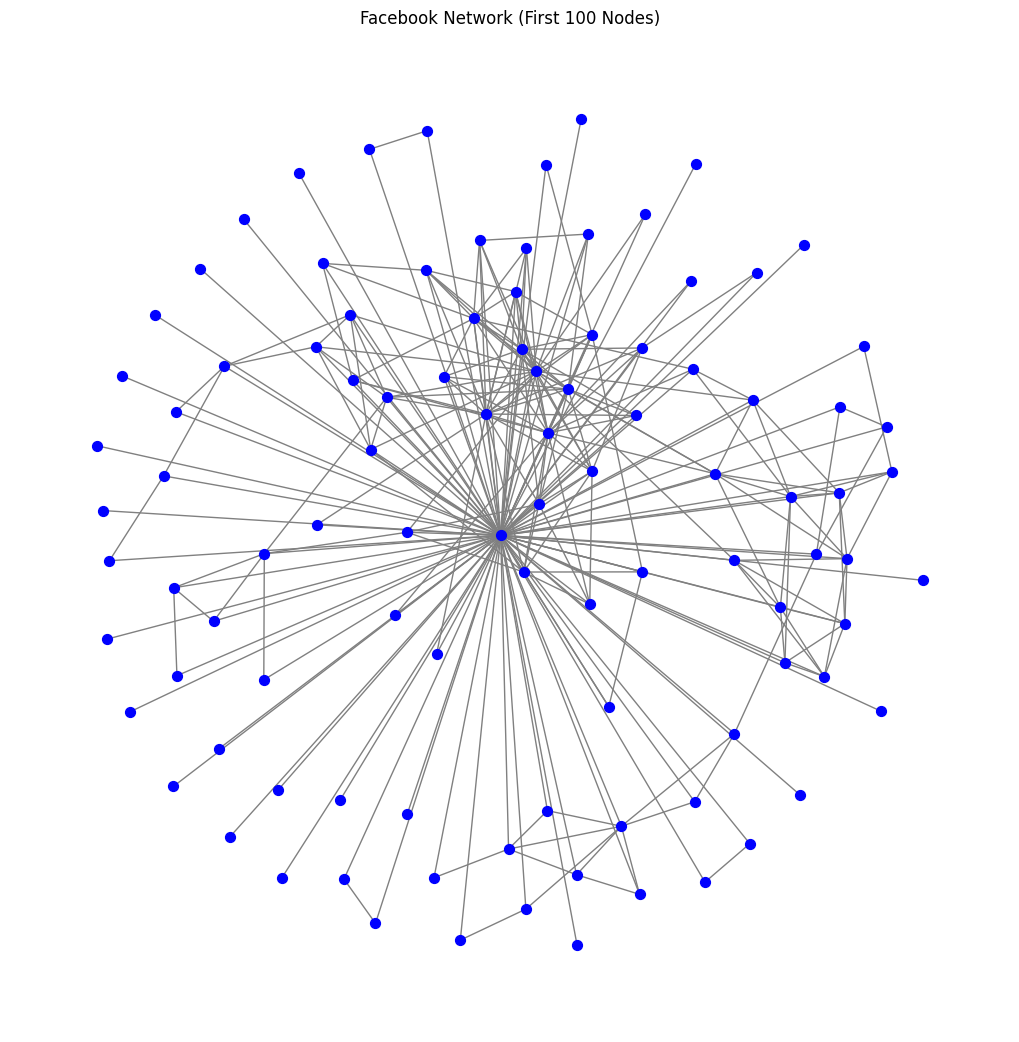

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.read_edgelist("facebook_combined.txt.gz", nodetype=int)

print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

degree_sequence = [G.degree(n) for n in G.nodes()]
plt.hist(degree_sequence, bins=30)
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()

clustering_coeff = nx.average_clustering(G)
print("Average Clustering Coefficient:", clustering_coeff)

centrality = nx.degree_centrality(G)
print("Degree Centrality of first 5 nodes:", {k: centrality[k] for k in list(centrality)[:5]})

connected_components = lis(nx.connected_components(G))
print("Number of connected components:", len(connected_components))


largest_component = max(connected_components, key=len)
print("Size of the largest connected component:", len(largest_component))


plt.figure(figsize=(10, 10))
subgraph = G.subgraph(list(G.nodes())[:100])
nx.draw(subgraph, node_size=50, node_color='blue', edge_color='gray', with_labels=False)
plt.title("Facebook Network (First 100 Nodes)")
plt.show()

In [7]:
ER_G = nx.erdos_renyi_graph(4039, 0.01)
print("Number of nodes in ER graph:", ER_G.number_of_nodes())
print("Number of edges in ER graph:", ER_G.number_of_edges())

Number of nodes in ER graph: 4039
Number of edges in ER graph: 81436


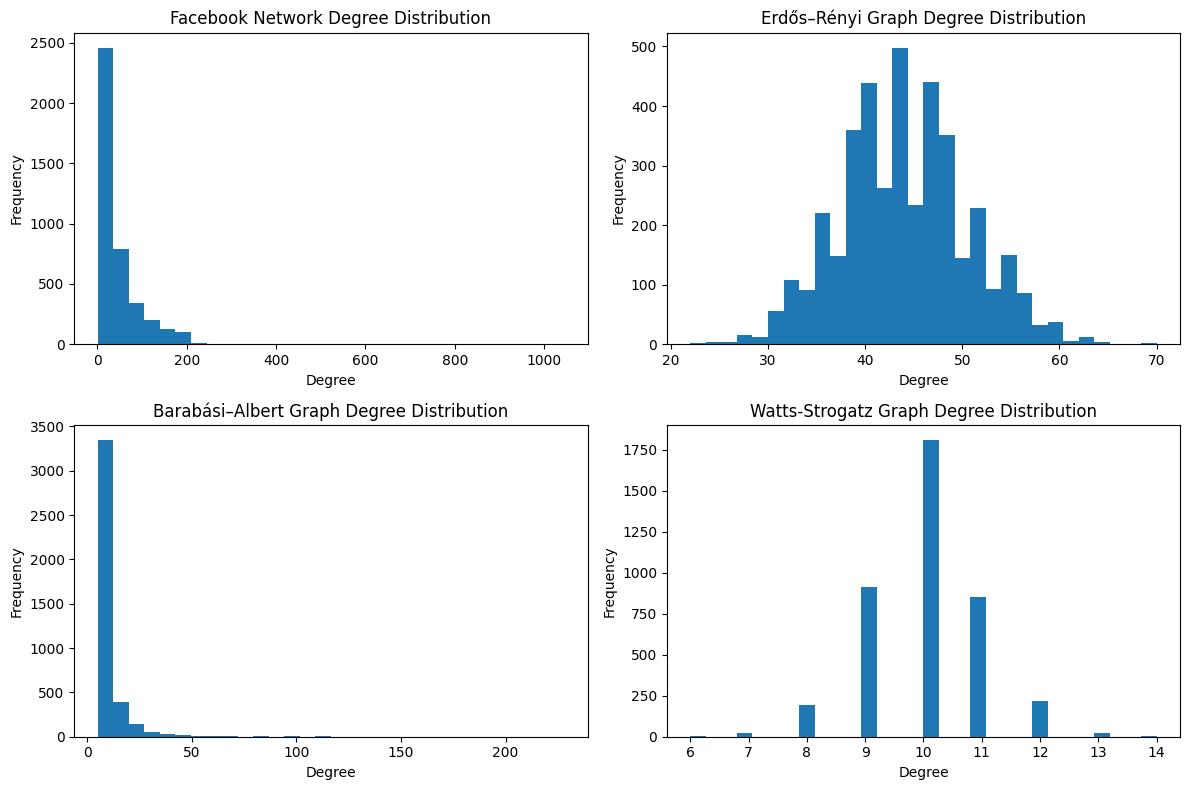

Facebook:
  Average Clustering Coefficient: 0.6055
  Number of Connected Components: 1
  Size of the Largest Connected Component: 4039
  Top 5 Degree Centralities: [(107, 0.258791480931154), (1684, 0.1961367013372957), (1912, 0.18697374938088163), (3437, 0.13546310054482416), (0, 0.08593363051015354)]
--------------------------------------------------
Erdős–Rényi:
  Average Clustering Coefficient: 0.0109
  Number of Connected Components: 1
  Size of the Largest Connected Component: 4039
  Top 5 Degree Centralities: [(3104, 0.01733531451213472), (3031, 0.017087667161961365), (1329, 0.016097077761267953), (1517, 0.016097077761267953), (2822, 0.0158494304110946)]
--------------------------------------------------
Barabási–Albert:
  Average Clustering Coefficient: 0.0141
  Number of Connected Components: 1
  Size of the Largest Connected Component: 4039
  Top 5 Degree Centralities: [(0, 0.05646359583952451), (7, 0.052005943536404156), (5, 0.04977711738484398), (10, 0.04507181773155027), (6

In [14]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.read_edgelist("facebook_combined.txt.gz", nodetype=int)

def compute_degree_distribution(G):
    degree_sequence = [G.degree(n) for n in G.nodes()]
    return degree_sequence

def plot_degree_distribution(graphs, titles):
    plt.figure(figsize=(12, 8))
    for i, (graph_name, graph) in enumerate(graphs.items()):
        degree_sequence = compute_degree_distribution(graph)
        plt.subplot(2, 2, i+1)
        plt.hist(degree_sequence, bins=30)
        plt.title(f"{titles[i]} Degree Distribution")
        plt.xlabel("Degree")
        plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

def compute_clustering(G):
    return nx.average_clustering(G)

def compute_degree_centrality(G):
    return nx.degree_centrality(G)

def compute_connected_components(G):
    components = list(nx.connected_components(G))
    largest_component = max(components, key=len)
    return len(components), len(largest_component)


def compare_networks():

    n_nodes = G.number_of_nodes()
    n_edges = G.number_of_edges()
    p = 2 * n_edges / (n_nodes * (n_nodes - 1))
    ER_G = nx.erdos_renyi_graph(n_nodes, p)


    m = 5
    BA_G = nx.barabasi_albert_graph(n_nodes, m)


    k = 10
    p_rewiring = 0.1
    WS_G = nx.watts_strogatz_graph(n_nodes, k, p_rewiring)


    graphs = {'Facebook': G, 'Erdős–Rényi': ER_G, 'Barabási–Albert': BA_G, 'Watts-Strogatz': WS_G}
    titles = ['Facebook Network', 'Erdős–Rényi Graph', 'Barabási–Albert Graph', 'Watts-Strogatz Graph']


    plot_degree_distribution(graphs, titles)


    for graph_name, graph in graphs.items():
        clustering = compute_clustering(graph)
        degree_centrality = compute_degree_centrality(graph)
        connected_components_count, largest_component_size = compute_connected_components(graph)

        print(f"{graph_name}:")
        print(f"  Average Clustering Coefficient: {clustering:.4f}")
        print(f"  Number of Connected Components: {connected_components_count}")
        print(f"  Size of the Largest Connected Component: {largest_component_size}")


        top_5_centrality = sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True)[:5]
        print(f"  Top 5 Degree Centralities: {top_5_centrality}")
        print("-" * 50)

compare_networks()

Key Findings:
1.Network Characteristics:
 The Facebook network (represented by the `G` graph) is relatively large with a considerable number of nodes and edges.
 The degree distribution of the Facebook network exhibits a heavy tail, indicating the presence of hubs (nodes with a high number of connections).
 The average clustering coefficient is relatively high, suggesting a tendency for nodes to form clusters or communities.


2.Centrality and Connected Components:
Degree centrality analysis reveals the existence of nodes with significantly higher connectivity than others.
The network has a single giant connected component, with the remaining nodes belonging to smaller isolated components.


3.Comparison with Random Network Models:
  The code compares the Facebook network with Erdős–Rényi, Barabási–Albert, and Watts-Strogatz random network models.
  These comparisons can help determine the presence of specific structural patterns in the Facebook network that deviate from random networks.



Conclusions:
Real-world Networks are Different: The Facebook network exhibits characteristics typical of real-world networks like social networks. These networks are not random, but rather exhibit features like hubs, community structure, and a non-Poisson degree distribution.


2.Hubs are Important The presence of hubs in the network suggests that a few nodes play a crucial role in information flow and network organization.


3.Community Structure: The relatively high clustering coefficient indicates that the network has a degree of community structure, where users tend to form groups with stronger connections within the groups.


4.Giant Connected Component: The existence of a giant connected component reveals that the majority of Facebook users are relatively connected to each other, allowing for relatively efficient information dissemination.

Model Comparisons Provide Insights:The comparison with various random network models helps us understand the unique characteristics of the Facebook network and identify potential patterns that might not be explained by pure randomness.

In essence, this code analyzes the structure and properties of the Facebook network, uncovering key characteristics that distinguish it from random network models and highlighting the importance of hubs, clustering, and connected components in the social network.